# fCCZ4

In [1]:
Needs["xAct`xCoba`", FileNameJoin[{Environment["GENERATO"], "src/Generato.wl"}]];

------------------------------------------------------------
Package xAct`xPerm`  version 1.2.3, {2015, 8, 23}
CopyRight (C) 2003-2020, Jose M. Martin-Garcia, under the General Public\
 
>   License.
Connecting to external mac executable...
Connection established.
------------------------------------------------------------
Package xAct`xTensor`  version 1.2.0, {2021, 10, 17}
CopyRight (C) 2002-2021, Jose M. Martin-Garcia, under the General Public\
 
>   License.
------------------------------------------------------------
These packages come with ABSOLUTELY NO WARRANTY; for details type\
 
>   Disclaimer[]. This is free software, and you are welcome to redistribute\
 
>   it under certain conditions. See the General Public License for details.
------------------------------------------------------------
------------------------------------------------------------
Package xAct`xCoba`  version 0.8.6, {2021, 2, 28}
CopyRight (C) 2005-2021, David Yllanes and Jose M. Martin-Garcia, under t

In [2]:
(* set mode to check equations *)
SetCheckInputEquations[True];

In [4]:
DefManifold[M3, 3, IndexRange[a, z]];

#### Basis Transformation

In [5]:
DefChart[sph, M3, {1, 2, 3}, {ra[], th[], ph[]}, ChartColor -> Blue];

In [6]:
DefBasis[Osph, TangentM3, {1, 2, 3}, BasisColor -> Red];

In [7]:
SetBasisChange[CTensor[{{1, 0, 0}, {0, ra[], 0}, {0, 0, ra[] Sin[th[]]}}, {-sph, Osph}], sph];

#### Set Refrence Metric

In [8]:
(*<<wl/reference_metric.wl*)

In [9]:
DefMetric[1, gamh[-i, -j], cdh,
  SymbolOfCovD -> {"|", "\!\(\*OverscriptBox[\(D\), \(^\)]\)"},
  PrintAs -> "\!\(\*OverscriptBox[\(\[Gamma]\), \(^\)]\)"
];

In [10]:
MetricInBasis[gamh, -sph, DiagonalMatrix[{1, ra[]^2, ra[]^2 Sin[th[]]^2}]];

In [11]:
(*MetricCompute[gamh, sph, All, Parallelize -> True, Verbose -> False]*)

In [12]:
(*SetRefMetrics[sph];*)

#### Define Variables and Equations

In [13]:
(* only define to workaround IsDefined *)
DefTensor[gamhdet[], M3, PrintAs -> "\!\(\*OverscriptBox[\(\[Gamma]\), \(^\)]\)"];
DefTensor[dgamh[-k, -i, -j], M3, Symmetric[{-i, -j}], PrintAs -> "\[PartialD]\!\(\*OverscriptBox[\(\[Gamma]\), \(^\)]\)"];
DefTensor[dgamhdet[-k], M3, PrintAs -> "\[PartialD]\!\(\*OverscriptBox[\(\[Gamma]\), \(^\)]\)"];
DefTensor[ddgamhdet[-k, -l], M3, Symmetric[{-k, -l}], PrintAs -> "\[PartialD]\[PartialD]\!\(\*OverscriptBox[\(\[Gamma]\), \(^\)]\)"];
DefTensor[Gamh[k, -i, -j], M3, Symmetric[{-i, -j}], PrintAs -> "\!\(\*OverscriptBox[\(\[CapitalGamma]\), \(^\)]\)"];
DefTensor[dGamh[-k, l, -i, -j], M3, Symmetric[{-i, -j}], PrintAs -> "\[PartialD]\!\(\*OverscriptBox[\(\[CapitalGamma]\), \(^\)]\)"];

In [20]:
<<wl/basis_transformation.wl

In [21]:
<<"wl/CCZ4_vars.wl"

In [22]:
<<"wl/CCZ4_rhs.wl"

In [23]:
TransEvolOrthToCoord[Osph, sph];
TransEvolRHSCoordToOrth[sph, Osph];

In [25]:
Module[{Mat, invMat},
  Mat =
    Table[gamb[{ii, -sph}, {jj, -sph}] // ToValues, {ii, 1, 3}, {jj, 1, 3}];
  invMat = Inverse[Mat] /. {1 / Det[Mat] -> invgambdet[]};
  SetEQNDelayed[invgambdet[], 1 / gamhdet[]];
  SetEQNDelayed[invgamb[i_, j_], invMat[[i[[1]], j[[1]]]] // Simplify]
];

## Check Expressions

In [26]:
rhsof[var_] := Module[{}, var /. {var[[0]] :> RHSOf[ToString[var[[0]]]]}];
eqssof[varlist_] := Module[{var}, 
   Table[var = varlist[[ivar]][[1]]; var == rhsof[var]//ScreenDollarIndices, {ivar, 1, Length[varlist]}]];

## Transform Basis Orthonormal $\rightarrow$ Spherical

-Image-
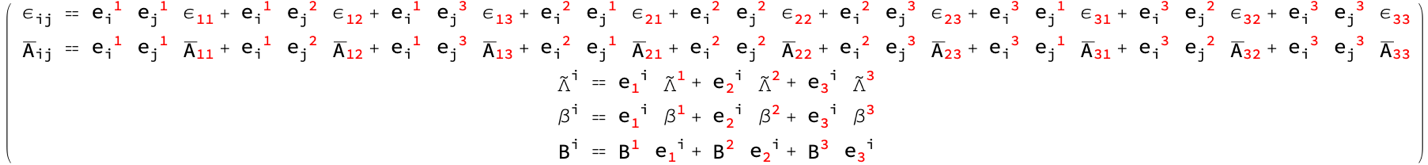

In [28]:
eqssof[EvolVarlist[[5;;-1]]] // MatrixForm // Rasterize

In [29]:
(*eqssof[dEvolVarlist[[5;;-1]]] // MatrixForm // Rasterize*)

In [30]:
(*eqssof[ddEvolVarlist[[{3}]]] // MatrixForm*)

## Intermediate Variables

-Image-
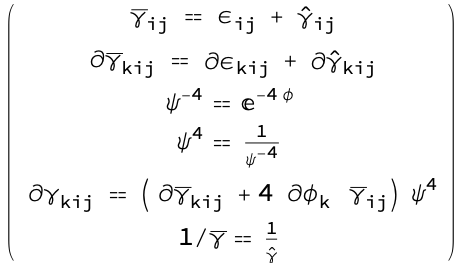

In [31]:
eqssof[IntermediateVarlist[[1;;6]]] // MatrixForm // Rasterize

-Image-
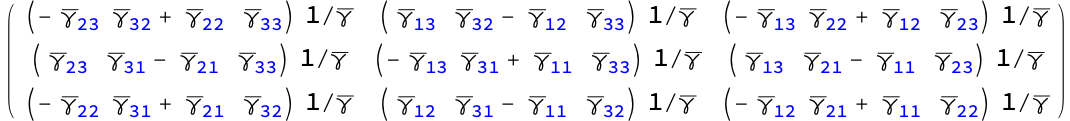

In [32]:
Table[invgamb$RHS[{ii, sph}, {jj, sph}] // ToValues, {ii, 1, 3}, {jj, 1,3}] // MatrixForm // Rasterize

-Image-
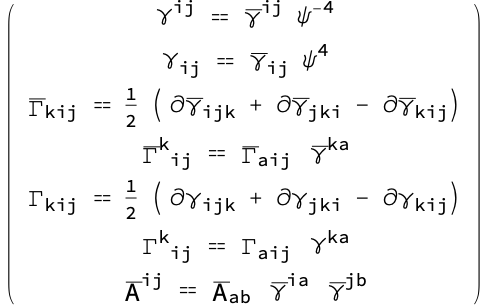

In [33]:
eqssof[IntermediateVarlist[[8;;-1]]] // MatrixForm // Rasterize

-Image-
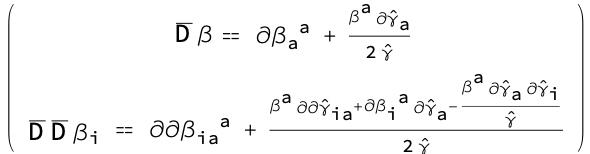

In [34]:
eqssof[bDVarlist] // MatrixForm // Rasterize

-Image-
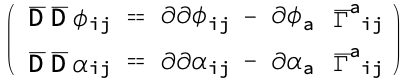

In [35]:
eqssof[bDbDVarlist] // MatrixForm // Rasterize

-Image-
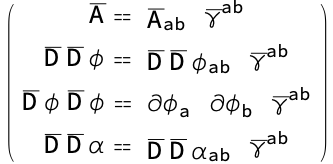

In [36]:
eqssof[trVarlist] // MatrixForm // Rasterize

-Image-
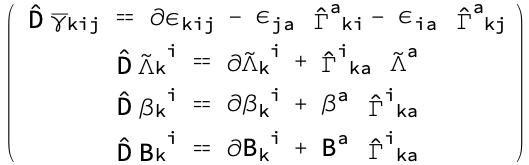

In [37]:
eqssof[hDVarlist] // MatrixForm // Rasterize

-Image-
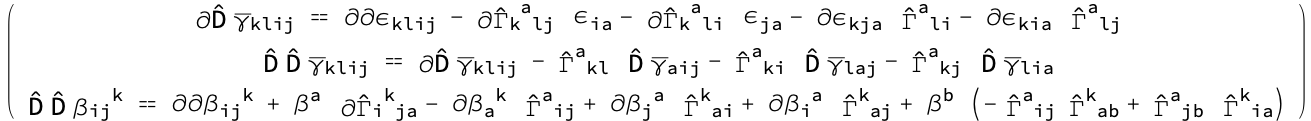

In [38]:
eqssof[hDhDVarlist] // MatrixForm // Rasterize

-Image-
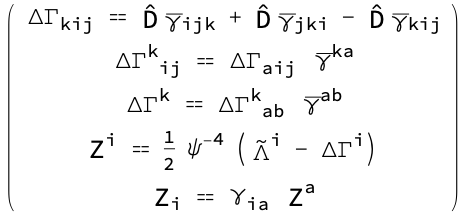

In [39]:
eqssof[DGamVarlist] // MatrixForm // Rasterize

-Image-
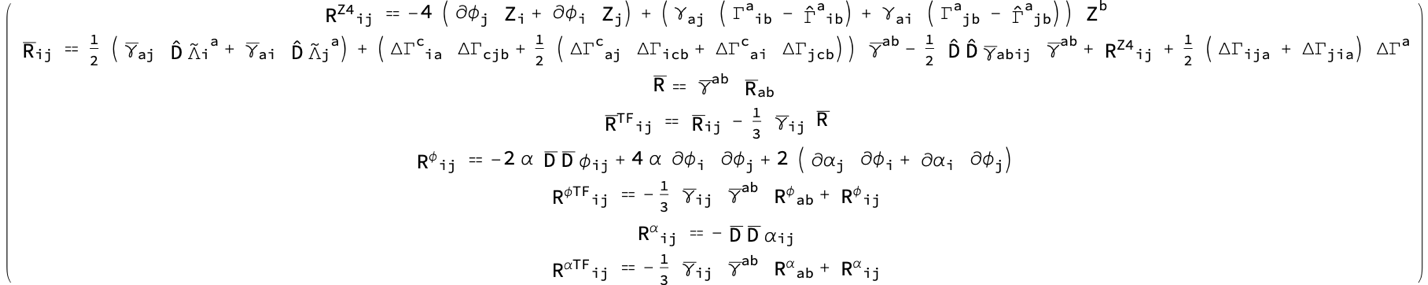

In [40]:
eqssof[RVarlist] // MatrixForm // Rasterize

-Image-
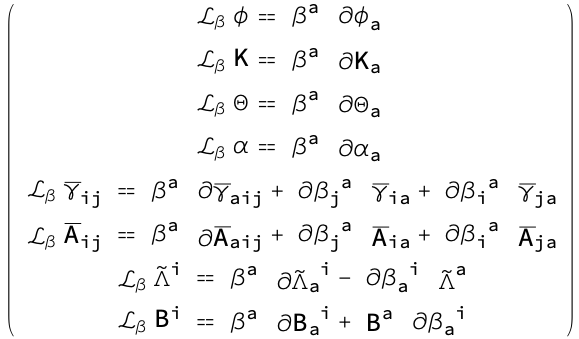

In [41]:
eqssof[LieVarlist] // MatrixForm // Rasterize

-Image-
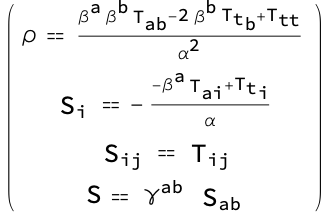

In [42]:
eqssof[MatterVarlist] // MatrixForm // Rasterize

-Image-
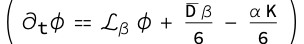

In [43]:
eqssof[dtEvolVarlist[[1;;1]]] // MatrixForm // Rasterize

-Image-
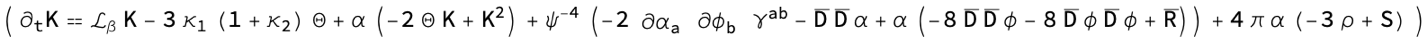

In [44]:
eqssof[dtEvolVarlist[[2;;2]]] // MatrixForm // Rasterize

-Image-
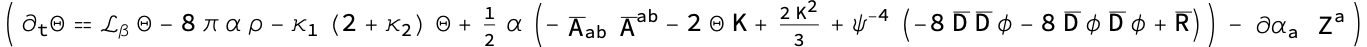

In [45]:
eqssof[dtEvolVarlist[[3;;3]]] // MatrixForm // Rasterize

-Image-
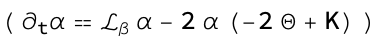

In [46]:
eqssof[dtEvolVarlist[[4;;4]]] // MatrixForm // Rasterize

-Image-
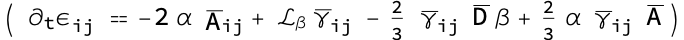

In [47]:
eqssof[dtEvolVarlist[[5;;5]]] // MatrixForm // Rasterize

-Image-
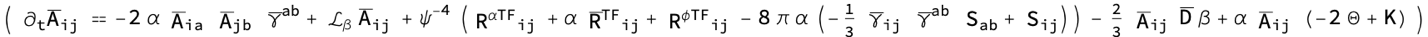

In [48]:
eqssof[dtEvolVarlist[[6;;6]]] // MatrixForm // Rasterize

-Image-
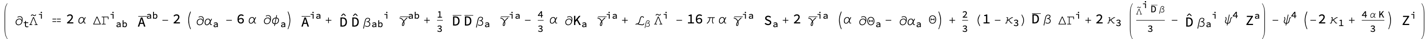

In [49]:
eqssof[dtEvolVarlist[[7;;7]]] // MatrixForm // Rasterize

-Image-
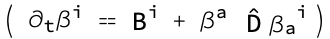

In [50]:
eqssof[dtEvolVarlist[[8;;8]]] // MatrixForm // Rasterize

-Image-
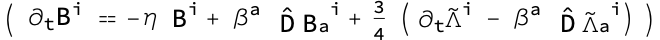

In [51]:
eqssof[dtEvolVarlist[[9;;9]]] // MatrixForm // Rasterize